# Shift-Share RS

## Notebook Description
...

## 0. Imports

### 0.1. Libraries

In [3]:
# Data manipulation libraries
import pandas as pd
import numpy as np
import geopandas as gpd

# Data visualization libraries
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

# Others
import warnings

### 0.2. Settings

In [4]:
# Ignoring warnings
warnings.filterwarnings('ignore')

# Pandas Settings
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', None)

# Visualization Settings
%matplotlib inline

mpl.style.use('ggplot') 

mpl.rcParams['figure.titlesize']    = 24
mpl.rcParams['figure.figsize']      = (20, 5)
mpl.rcParams['axes.facecolor']      = 'white'
mpl.rcParams['axes.linewidth']      = 1
mpl.rcParams['xtick.color']         = 'black'
mpl.rcParams['ytick.color']         = 'black'
mpl.rcParams['grid.color']          = 'lightgray'
mpl.rcParams['figure.dpi']          = 150
mpl.rcParams['axes.grid']           = True
mpl.rcParams['font.size']           = 12

### 0.3. Functions

In [5]:
def df_shape(df):
    """
    Summary: The function prints the number of rows and columns of a given DataFrame.
    Args: df: the DataFrame we want to know more about.
    Returns: text: text indicating the number of rows and columns of the DataFrame.
    """

    print('Number of rows: {}'.format(df.shape[0]))
    print('Number of columns: {}'.format(df.shape[1]))

    return None

def calculate_growth(df_list, crop_list, start_year, end_year):
    """
    Summary: Function to calculate delta and growth for each crop
    Args: df_list (list): List of dataframes
          crop_list (list): List of crops
          start_year (int): Starting year
          end_year (int): Ending year
    Returns: df (DataFrame): DataFrame with delta and growth for each crop
    """
    # Initialize the dataframe with the microregion from the first dataframe in the list
    df = pd.DataFrame()
    df['microregion'] = df_list[0]['microregion']
    
    # Loop through each crop and its corresponding dataframe in the list
    for i, crop in enumerate(crop_list):
        df_micro = df_list[i]
        
        # Calculate delta and growth for each crop
        df[f'delta_X{crop.capitalize()}k'] = df_micro[str(end_year)] - df_micro[str(start_year)]
        df[f'g{crop.capitalize()}k'] = df[f'delta_X{crop.capitalize()}k'] / df_micro[str(start_year)]
    
    return df

### 0.4. Classes

### 0.5. Datasets

In [73]:
# Mesoregions
# df_meso_soy  = pd.read_csv('../data/interim/meso_soja.csv')
# df_meso_corn = pd.read_csv('../data/interim/meso_milho.csv')
# df_meso_rice = pd.read_csv('../data/interim/meso_arroz.csv')

# Microregions
df_micro_soy  = pd.read_csv('../data/interim/micro_soja.csv')
df_micro_corn = pd.read_csv('../data/interim/micro_milho.csv')
df_micro_rice = pd.read_csv('../data/interim/micro_arroz.csv')

# Municipalities
# df_mun_soy  = pd.read_csv('../data/interim/mun_soja.csv')
# df_mun_corn = pd.read_csv('../data/interim/mun_arroz.csv')
# df_mun_rice = pd.read_csv('../data/interim/mun_arroz.csv')

# GeoData
# df_meso_geodata = gpd.read_file('../data/geodata/malha_mesorregioes.geojson')
df_micro_geodata = gpd.read_file('../data/geodata/malha_microrregioes.geojson')
# df_mun_geodata = gpd.read_file('../data/geodata/malha_municipios.geojson')

## 1. Data Description

In [8]:
df_micro_soybean.head()

,microregion,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Cachoeira do Sul,30170,37170,46720,65930,83080,88100,84020,83020,83650,87650,88160,94950,140860,192825,209455,217900,223450,228310,239794,207870,220500,216000,229373
1,Camaquã,1704,3804,5028,4516,8020,8242,7000,6252,5636,5311,4410,6553,22493,34919,41764,45401,49947,47808,51096,52645,57350,60310,67186
2,Campanha Central,29840,40340,42800,64900,97700,106500,91000,93000,99000,88000,102000,96000,118000,147100,160000,200800,200000,215000,217000,249800,256000,261000,306000
3,Campanha Meridional,3870,9400,15400,29050,45300,48616,30100,46100,38100,39692,44200,39100,79100,130300,134300,166000,170000,171383,196500,225500,225000,245500,275500
4,Campanha Ocidental,109452,103585,124070,155150,204700,222058,177480,155233,138470,117185,134000,131000,157348,185840,201504,217950,226437,237990,250766,277731,332748,338692,399406


In [ ]:
# Options for the plot

df_melted = pd.melt(df_micro_soybean, id_vars=['microregion'], var_name='year', value_name='hectares')

aux = df_micro_soybean.set_index('microregion').T
aux.index = pd.to_datetime(aux.index, format='%Y')

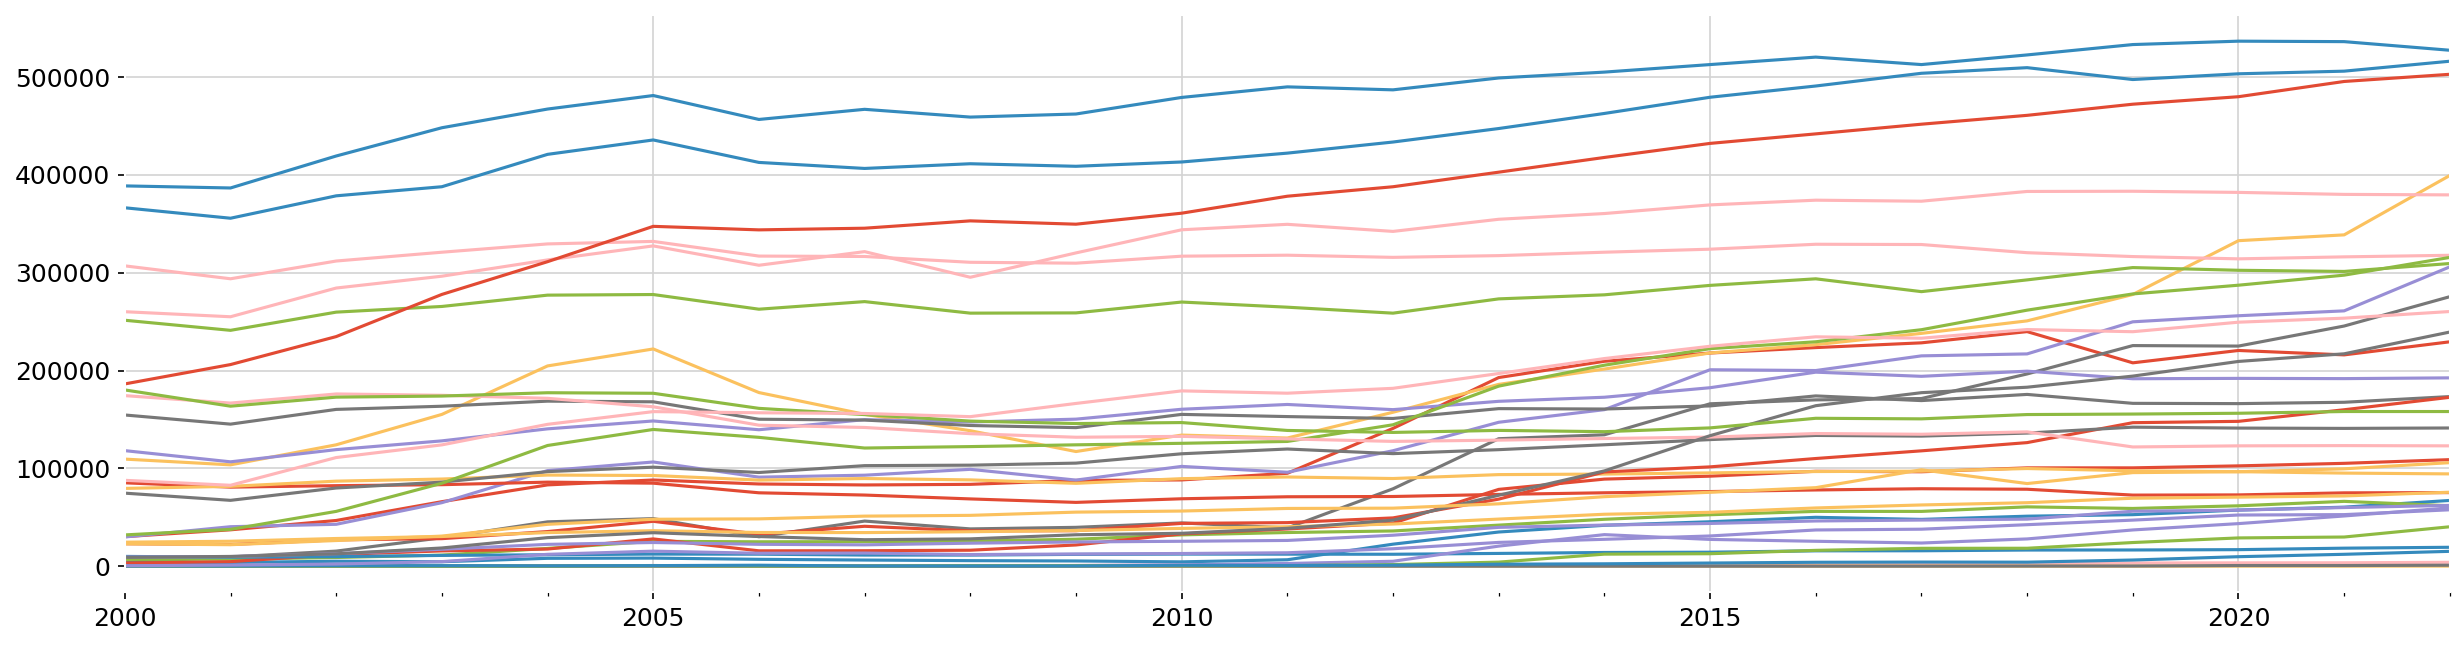

In [62]:
fig = aux.plot(legend=False)

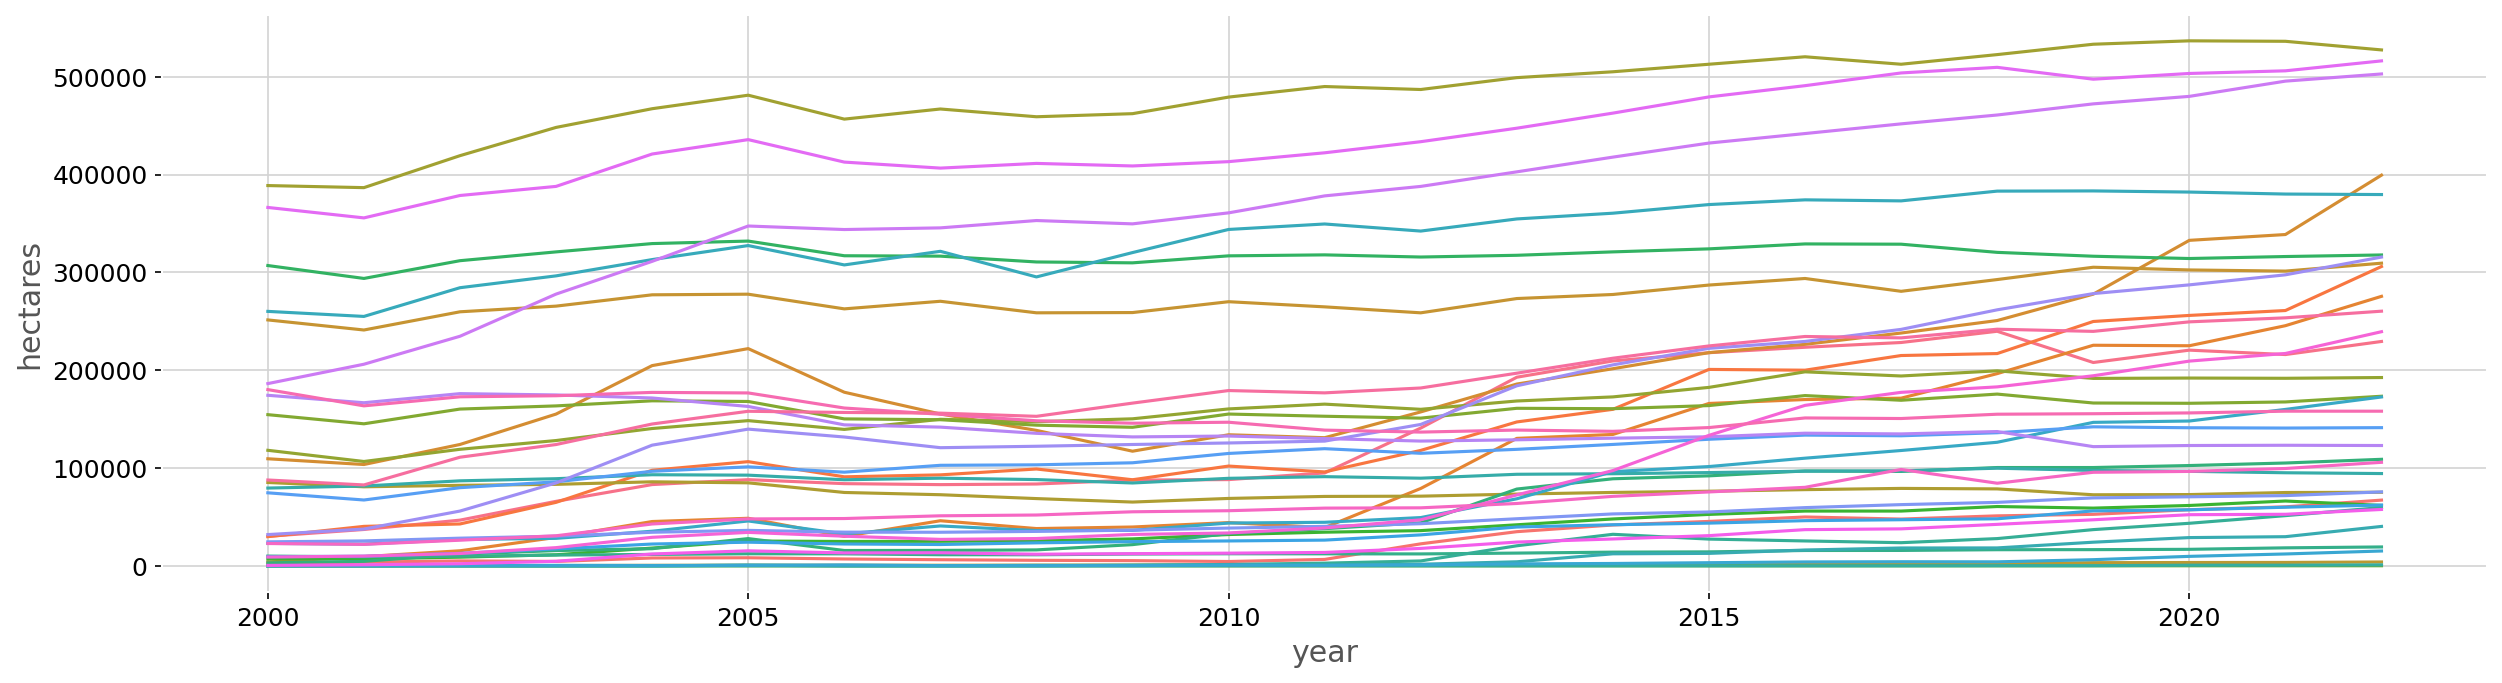

In [66]:
ax = sns.lineplot(x='year', y='hectares', hue='microregion', data=df_melted, legend=False)

## 2. Shift-Share Calculations

### 2.1. Variations over years

In [78]:
g06_10 = calculate_growth([df_micro_soy, df_micro_corn, df_micro_rice], ['soy', 'corn', 'rice'], 2006, 2010)

g10_14 = calculate_growth([df_micro_soy, df_micro_corn, df_micro_rice], ['soy', 'corn', 'rice'], 2010, 2014)

g14_18 = calculate_growth([df_micro_soy, df_micro_corn, df_micro_rice], ['soy', 'corn', 'rice'], 2014, 2018)

g18_22 = calculate_growth([df_micro_soy, df_micro_corn, df_micro_rice], ['soy', 'corn', 'rice'], 2018, 2022)

In [81]:
g06_10

,microregion,delta_XSoyk,gSoyk,delta_XCornk,gCornk,delta_XRicek,gRicek
0,Cachoeira do Sul,4140,0.05,-2235,-0.11,1134,0.02
1,Camaquã,-2590,-0.37,1520,0.09,13047,0.19
2,Campanha Central,11000,0.12,-300,-0.04,2210,0.03
3,Campanha Meridional,14100,0.47,650,0.08,5535,0.09
4,Campanha Ocidental,-43480,-0.24,-8680,-0.24,14884,0.05
5,Carazinho,7320,0.03,-14225,-0.21,-379,-0.48
6,Caxias do Sul,418,0.70,-545,-0.02,-16,-0.70
7,Cerro Largo,-6100,-0.08,-2120,-0.05,-110,-0.87
8,Cruz Alta,22508,0.05,-24270,-0.44,-117,-0.55
9,Erechim,20941,0.15,-48840,-0.40,-150,-0.49


In [ ]:
growth = g06_10.merge(g10_14, on='microregion', suffixes=('_06_10', '_10_14')).merge(g14_18, on='microregion', suffixes=('_10_14', '_14_18')).merge(g18_22, on='microregion', suffixes=('_14_18', '_18_22'))

growth

# Table 5. Decomposition of Growth into Components of Variation

### 5.1. Structural Component

### 5.2. Regional Component

### 5.3. National Component

### 5.4. Effective Variation (1+2+3)